# STAT479 - Poker Hands Classification

## Part 1. Data Exploration

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# The followings are some initializations:
# Import Poker hands in text form
data = pd.read_csv("poker-hand-training-true.csv")
data.columns = ["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4","S5", "C5", "Class"]
data.head()

data.loc[data["Class"] > 0,["Class"]] = 1

In [13]:
# dropna used to ignore NA values
data = data.dropna()
data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,2,11,2,13,2,10,2,12,2,1,1
1,3,12,3,11,3,13,3,10,3,1,1
2,4,10,4,11,4,1,4,13,4,12,1
3,4,1,4,13,4,12,4,11,4,10,1
4,1,2,1,4,1,5,1,3,1,6,1


Let's keep a map of poker hand class id to class name.  
There are exactly 10 type of poker hands.

In [14]:
types = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
hand_name = {
    0: 'Nothing in hand',
    1: 'One pair',
    2: 'Two pairs',
    3: 'Three of a kind',
    4: 'Straight',
    5: 'Flush',
    6: 'Full house',
    7: 'Four of a kind',
    8: 'Straight flush',
    9: 'Royal flush',
}

X_train = data[["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4","S5", "C5"]]
Y_train = data[["Class"]]
#X_train.head()

In [15]:
# Count how many poker hands belong to each type

classNum = 10  # we have 10 classes of poker hand types
classCnt = {}
for i in range(classNum):
    classCnt[i] = len(data[["Class"]]==i)

print(classCnt)

{0: 25009, 1: 25009, 2: 25009, 3: 25009, 4: 25009, 5: 25009, 6: 25009, 7: 25009, 8: 25009, 9: 25009}


Let's make the above instances more readable and informative.

In [8]:
for i in types:
    print("%s: %d" % (hand_name[i], classCnt[i]))

Nothing in hand: 25009
One pair: 25009
Two pairs: 25009
Three of a kind: 25009
Straight: 25009
Flush: 25009
Full house: 25009
Four of a kind: 25009
Straight flush: 25009
Royal flush: 25009


Text(0, 0.5, 'Instances')

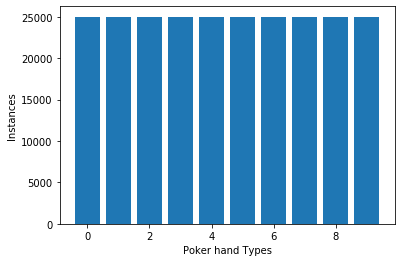

In [9]:
plt.bar(types, [classCnt[i] for i in types], align='center')
plt.xlabel('Poker hand Types')
plt.ylabel('Instances')

## Part 1.2  Splitting Data
Use the `train_test_split` function from scikit-learn to divide the training dataset further into a training subset and a validation set. We assume the validation set to be the 20% of the training dataset size, and the training subset should be 80% of the training dataset size. 

In [27]:
from sklearn.model_selection import train_test_split
def test_size1(size):
    X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, Y_train,
                                                          test_size = size,
                                                          random_state = 123,
                                                          stratify=Y_train)
    X_train1 = pd.DataFrame(X_train1)
    return X_train1

def test_size2(size):
    X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, Y_train,
                                                          test_size = size,
                                                          random_state = 123,
                                                          stratify=Y_train)
    X_valid = pd.DataFrame(X_valid)
    return X_valid

def test_size3(size):
    X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, Y_train,
                                                          test_size = size,
                                                          random_state = 123,
                                                          stratify=Y_train)
    y_train1 = pd.DataFrame(y_train1)
    return y_train1

def test_size4(size):
    X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, Y_train,
                                                          test_size = size,
                                                          random_state = 123,
                                                          stratify=Y_train)
    y_valid = pd.DataFrame(y_valid)
    return y_valid

## Part 2 Testing Data

In [16]:
test = pd.read_csv("poker-hand-testing.csv")
test.columns = ["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4","S5", "C5", "Class"]
test.head()
test.shape[0]

999999

In [17]:
X_test = test[["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4","S5", "C5"]]
Y_test = test[["Class"]]

## Part 3 Training Methods

## 3.1 KNN

Training Set Accuracy

In [42]:
from sklearn.neighbors import KNeighborsClassifier

X_train1 = test_size1(0.2)
Y_train1 = test_size3(0.2)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train1, np.ravel(Y_train1))

num_correct = (knn.predict(X_train1) == np.ravel(Y_train1)).sum()
print('Errors:',  Y_train1.shape[0] - num_correct)
accuracy = (num_correct / Y_train1.shape[0]) * 100
print('Accuracy of Training Set:', accuracy)

Errors: 5114
Accuracy of Training Set: 74.43894636877093


Validation Set Accuracy

In [43]:
X_valid = test_size2(0.2)
Y_valid = test_size4(0.2)

num_correct = (knn.predict(X_valid) == np.ravel(Y_valid)).sum()
print('Errors:',  Y_valid.shape[0] - num_correct)
accuracy = (num_correct / Y_valid.shape[0]) * 100
print('Accuracy of Validation Set:', accuracy)

Errors: 2359
Accuracy of Validation Set: 52.83886445421832


Test Set Accuracy

In [44]:
num_correct = (knn.predict(X_test) == np.ravel(Y_test)).sum()
print('Errors:',  Y_test.shape[0] - num_correct)
accuracy = (num_correct / Y_test.shape[0]) * 100
print('Accuracy of Test Set:', accuracy)

Errors: 7473
Accuracy of Test Set: 70.11875724739095


In [58]:
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, np.ravel(Y_train1))
    n1 = (knn.predict(X_train1) == np.ravel(Y_train1)).sum()
    acc1 = (n1 / Y_train1.shape[0]) * 100

    n2 = (knn.predict(X_valid) == np.ravel(Y_valid)).sum()
    acc2 = (n2 / Y_valid.shape[0]) * 100
    
    n3 = (knn.predict(X_test) == np.ravel(Y_test)).sum()
    acc3 = (n3 / Y_test.shape[0]) * 100
    
    print('%2d:' % k,
          '| Train Acc: %2f' %  acc1,
          '| Valid Acc: %2f' % acc2,
          '| Test Acc: %2f' % acc3)

 1: | Train Acc: 100.000000 | Valid Acc: 50.439824 | Test Acc: 90.087568
 3: | Train Acc: 74.438946 | Valid Acc: 52.838864 | Test Acc: 70.118757
 5: | Train Acc: 69.510671 | Valid Acc: 55.017993 | Test Acc: 66.612020
 7: | Train Acc: 67.141500 | Valid Acc: 55.657737 | Test Acc: 64.844656
 9: | Train Acc: 66.016894 | Valid Acc: 55.877649 | Test Acc: 63.988964


## 3.2 Gradient Boost

## 3.3 Random Forest

In [19]:
%load_ext watermark
%watermark  -d -u -a 'Jing Huang' -v -p numpy,scipy,matplotlib,sklearn

Jing Huang 
last updated: 2019-11-24 

CPython 3.7.4
IPython 7.8.0

numpy 1.17.2
scipy 1.3.1
matplotlib 3.1.1
sklearn 0.21.3


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydotplus import graph_from_dot_data
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
import collections
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
for i in np.arange(0.1, 1.0, 0.1):
    X_train1 = test_size1(i)
    y_train1 = test_size3(i)
    y_valid = test_size4(i)
    np.bincount(y_train1['Class'])
    np.bincount(y_valid['Class'])
    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train1, y_train1)
    data_feature_names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']
    dot_data = tree.export_graphviz(clf, out_file=None, filled=True,
                                    rounded=True, 
                                    feature_names=data_feature_names,  
                                    class_names=['0','1','2','3','4','5','6','7','8','9'])
    graph = pydotplus.graph_from_dot_data(dot_data)
    Image(graph.create_png())  

Labels counts in y_train: [9994 8479  965  410   75   43   29    5    4    3]
Labels counts in y_valid: [2499 2120  241  103   18   11    7    1    1    1]
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0366326 to fit



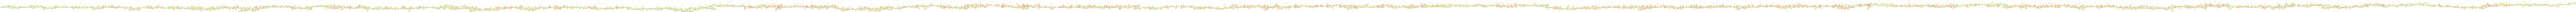

<Figure size 7200x7200 with 0 Axes>

In [40]:
# X_train1 = test_size1(0.2)
# y_train1 = test_size3(0.2)
# y_valid = test_size4(0.2)
# print('Labels counts in y_train:', np.bincount(y_train1['Class']))
# print('Labels counts in y_valid:', np.bincount(y_valid['Class']))
# plt.figure(figsize=(100,100))
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train1, y_train1)
# data_feature_names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']
# dot_data = tree.export_graphviz(clf, out_file=None, filled=True,
#                                 rounded=True, 
#                                 feature_names=data_feature_names,  
#                                 class_names=['0','1','2','3','4','5','6','7','8','9'])
# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())


/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


For test size =  0.1 : Accuracy 63.0%


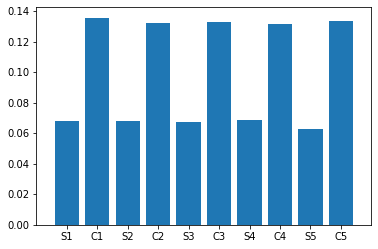

/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


For test size =  0.2 : Accuracy 61.7%


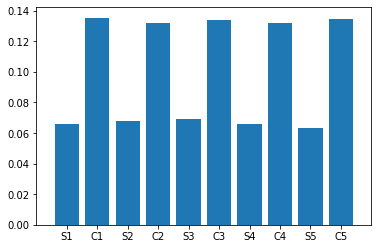

/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


For test size =  0.30000000000000004 : Accuracy 61.3%


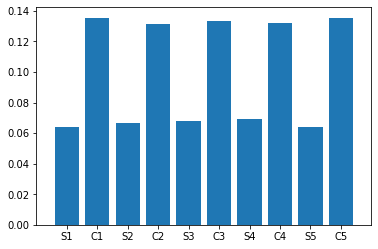

/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


For test size =  0.4 : Accuracy 61.0%


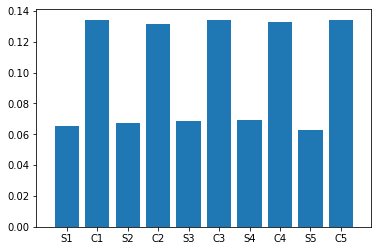

/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


For test size =  0.5 : Accuracy 60.0%


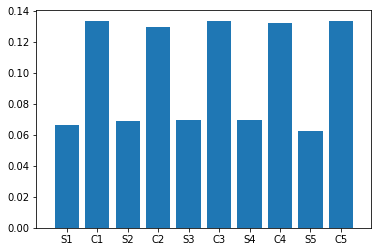

/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


For test size =  0.6 : Accuracy 59.1%


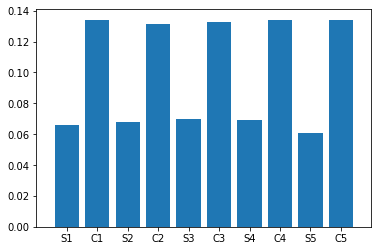

/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


For test size =  0.7000000000000001 : Accuracy 58.0%


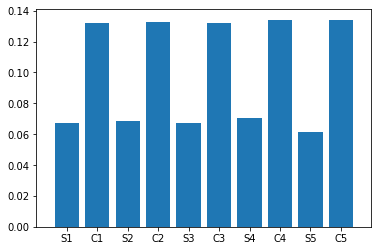

/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


For test size =  0.8 : Accuracy 56.5%


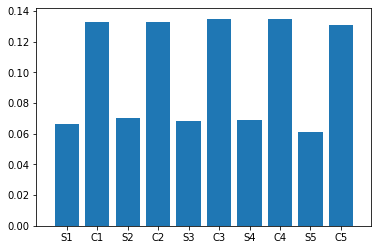

/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


For test size =  0.9 : Accuracy 54.1%


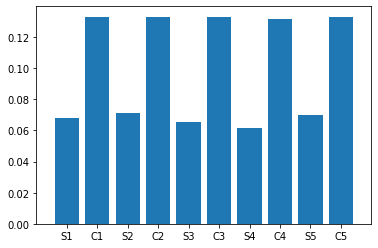

In [30]:
X_train1 = []
y_train1 = []
X_valid = []
y_valid = []
for i in np.arange(0.1, 1.0, 0.1):
    X_train1 = test_size1(i)
    y_train1 = test_size3(i)
    X_valid = test_size2(i)
    y_valid = test_size4(i)
    np.bincount(y_train1['Class'])
    np.bincount(y_valid['Class'])
    forest = RandomForestClassifier(n_estimators=500, random_state=123)
    forest.fit(X_train1, y_train1)
    acc = forest.score(X_valid, y_valid) * 100
    print('For test size = ', i, ': Accuracy %.1f%%' % acc)
    fig, ax = plt.subplots()
    ax.bar(range(X_train1.shape[1]), forest.feature_importances_)
    ax.set_xlim([-1, X_train1.shape[1]])
    ax.set_xticks(range(X_train1.shape[1]))
    ax.set_xticklabels(['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'])
    plt.show()
    

In [29]:
from sklearn import metrics
for i in np.arange(0.1, 1.0, 0.1):
    X_train1 = test_size1(i)
    y_train1 = test_size3(i)
    X_valid = test_size2(i)
    y_valid = test_size4(i)
    np.bincount(y_train1['Class'])
    np.bincount(y_valid['Class'])
    np.bincount(y_train1['Class'])
    np.bincount(y_valid['Class'])
    forest = RandomForestClassifier(n_estimators=500, random_state=123)
    forest.fit(X_train1, y_train1)
    y_pred = forest.predict(X_valid)
    print('For size value = ',i,'Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
    print('For size value = ',i,'Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
    print('For size value = ',i,'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


For size value =  0.1 Mean Absolute Error: 0.4290283886445422
For size value =  0.1 Mean Squared Error: 0.625749700119952
For size value =  0.1 Root Mean Squared Error: 0.791043424926819


/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


For size value =  0.2 Mean Absolute Error: 0.4436225509796082
For size value =  0.2 Mean Squared Error: 0.6419432227109156
For size value =  0.2 Root Mean Squared Error: 0.8012135936882971


/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


For size value =  0.30000000000000004 Mean Absolute Error: 0.44875383180061307
For size value =  0.30000000000000004 Mean Squared Error: 0.6489404238304678
For size value =  0.30000000000000004 Root Mean Squared Error: 0.8055683855703796


/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


For size value =  0.4 Mean Absolute Error: 0.45221911235505796
For size value =  0.4 Mean Squared Error: 0.6535385845661735
For size value =  0.4 Root Mean Squared Error: 0.8084173331678222


/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


For size value =  0.5 Mean Absolute Error: 0.4632546981207517
For size value =  0.5 Mean Squared Error: 0.6679728108756497
For size value =  0.5 Root Mean Squared Error: 0.81729603625348


/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


For size value =  0.6 Mean Absolute Error: 0.47527655604424895
For size value =  0.6 Mean Squared Error: 0.6871917899506864
For size value =  0.6 Root Mean Squared Error: 0.8289703191011645


/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


For size value =  0.7000000000000001 Mean Absolute Error: 0.4885474381675901
For size value =  0.7000000000000001 Mean Squared Error: 0.7086879533900725
For size value =  0.7000000000000001 Root Mean Squared Error: 0.8418360608753183


/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


For size value =  0.8 Mean Absolute Error: 0.5058976409436226
For size value =  0.8 Mean Squared Error: 0.7324070371851259
For size value =  0.8 Root Mean Squared Error: 0.8558078272516125


/Users/qiuhongli/anaconda3/envs/stat479/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


For size value =  0.9 Mean Absolute Error: 0.536940779243858
For size value =  0.9 Mean Squared Error: 0.7844862055177929
For size value =  0.9 Root Mean Squared Error: 0.8857122588729327


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn import metrics
for i in np.arange(0.1, 1.0, 0.1):
    X_train1 = test_size1(i)
    y_train1 = test_size3(i)
    X_valid = test_size2(i)
    y_valid = test_size4(i)
    np.bincount(y_train1['Class'])
    np.bincount(y_valid['Class'])
    np.bincount(y_train1['Class'])
    np.bincount(y_valid['Class'])
    forest = RandomForestClassifier(n_estimators=500, random_state=123)
    forest.fit(X_train1, y_train1)
    y_pred = forest.predict(X_valid)
    print('For size value = ',i)
    print("=== Confusion Matrix ===")
    print(confusion_matrix(y_valid, y_pred))
    print('\n')
    print("=== Classification Report ===")
    print(classification_report(y_valid, y_pred))
    print('\n')

In [ ]:
from pandas import Series, DataFrame

df = DataFrame({'test size':['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'],
       'Accuracy':[0.63, 0.617, 0.613, 0.61, 0.6, 0.591, 0.58, 0.565, 0.541]})

df = df.set_index("test size")
print(df)

In [ ]:
plt.figure(figsize=(80,80))
font1 = {'family' : 'Times New Roman', 'weight' : 'normal', 'size' : 18}
ax = df.plot.line(marker='o')
ax.set_xlabel('Text Size', font1)
ax.set_ylabel('Accuracy', font1)
ax.set_xticklabels(df.index, fontsize=12, rotation=60)
ax.set_xticks(range(len(df.index)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Accuracy Trend", fontsize=15)
plt.yticks(fontsize = 15)

## Part 4 Evaluation Method

## 4.1 LOOB

In [13]:
from mlxtend.evaluate import BootstrapOutOfBag

oob = BootstrapOutOfBag(n_splits=5, random_seed=99)
for train, test in oob.split(np.asarray(X_train1)):
    print(train, test)

[13497  3240  9929 ... 15507  7278  2406] [    0     1     2 ... 20000 20005 20006]
[18095  7838 14544 ... 14393  2076  3885] [    3     9    10 ... 19999 20001 20005]
[  645 11150 11257 ...  8008  2152 10182] [    6     7     8 ... 20000 20001 20004]
[ 6690  9793 15159 ... 12758  6101 12825] [    0     1     4 ... 19995 19997 20000]
[19061 10839 19683 ... 11647  2731   668] [    0     2     6 ... 20004 20005 20006]


## XG BOOST

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb_model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=8,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=123)

## HistGradient Boost

In [15]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

In [16]:
hgb_model = HistGradientBoostingClassifier(loss='categorical_crossentropy', learning_rate=0.05, 
                               max_iter=100, max_leaf_nodes=31, 
                               max_depth=None, min_samples_leaf=20,
                               l2_regularization=0.05, max_bins=256, 
                               scoring=None, validation_fraction=0.2, 
                               n_iter_no_change=None, 
                               tol=1e-07, 
                               verbose=0,
                               random_state=123)

## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

mlp_model = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#RandomForestClassifier(n_estimators=500, random_state=123)
#DecisionTreeClassifier(random_state=123, max_depth=3)
cv_acc = cross_val_score(estimator=mlp_model,
                         X=X_train1,
                         y=Y_train1,
                         cv=BootstrapOutOfBag(n_splits=200, random_seed=99),
                         n_jobs=-1)

print('OOB Bootstrap Accuracy: %.2f%%' % (np.mean(cv_acc)*100))

In [174]:
# from mlxtend.evaluate import bootstrap_point632_score

# cv_acc = bootstrap_point632_score(estimator=DecisionTreeClassifier(random_state=123, max_depth=3),
#                                   X=X_train1,
#                                   y=Y_train1,
#                                   method='oob',
#                                   n_splits=200,
#                                   random_seed=99)

# print('OOB Bootstrap Accuracy: %.2f%%' % (np.mean(cv_acc)*100))